In [562]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

dataset = pd.read_csv('products.csv',index_col=0)
dataset

,perf_name,brand,price,reviews,loves,ratings,frag_family,scent_type,key_notes
num,,,,,,,,,
1,CHANCE EAU TENDRE Eau de Toilette,CHANEL,85.0,477.0,74800,5.0,Fresh,Fresh Fruity Florals,"Citron, Jasmine, Teakwood"
2,COCO MADEMOISELLE Eau de Parfum,CHANEL,105.0,662.0,122700,4.5,Floral,Warm Floral,"Orange, Patchouli, Turkish Rose"
3,Saint Eau de Parfum,KVD VEGAN BEAUTY,85.0,3000.0,50300,4.5,Florals,Warm Florals,"Vanilla, Musk, Jasmine"
4,BLEU DE CHANEL Eau de Toilette,CHANEL,97.0,87.0,15500,5.0,Earthy and Woody,Warm Woods,"Citrus Accord, Labdanum, Sandalwood Cedar"
5,BLEU DE CHANEL Eau de Parfum,CHANEL,95.0,140.0,20900,5.0,Earthy and Woody,Warm Woods,"Citrus Accord, Labdanum, Sandalwood Cedar"
...,...,...,...,...,...,...,...,...,...
143,Mini Discovery Set,JULIETTE HAS A GUN,25.0,4.0,1500,4.0,NaN,NaN,NaN
144,Daisy Eau So Fresh,MARC JACOBS FRAGRANCES,118.0,941.0,47400,4.5,Floral,Fruity Florals,"Red Raspberry, Wild Rose, Warm Plum"
145,Luna Rossa Carbon,PRADA,94.0,58.0,3600,5.0,Earthy & Woody,Warm Woods,"Italian Bergamot, Lavender, Ambroxan"


CHANEL                    12
DIOR                      12
TOM FORD                   9
NEST NEW YORK              8
JO MALONE LONDON           6
MAISON MARGIELA            5
VIKTOR&ROLF                5
YVES SAINT LAURENT         4
GUCCI                      4
ATELIER COLOGNE            4
JULIETTE HAS A GUN         4
MAISON LOUIS MARIE         3
ACQUA DI PARMA             3
CLEAN RESERVE              3
BURBERRY                   3
MARC JACOBS FRAGRANCES     3
KVD VEGAN BEAUTY           3
DOLCE&GABBANA              3
ARMANI BEAUTY              3
SOL DE JANEIRO             3
Name: brand, dtype: int64

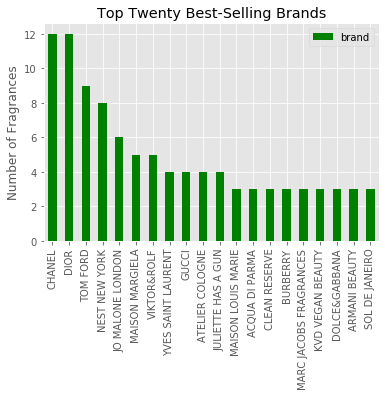

In [558]:
# analyze by brand 


#dataset.groupby('brand')['perf_name'].nunique()
s = pd.DataFrame(dataset['brand'].value_counts().nlargest(20))
s.plot.bar(color = 'green')
plt.title('Top Twenty Best-Selling Brands')
plt.ylabel('Number of Fragrances')
s = s.reset_index()
s.columns = ['brand', 'count']

dataset['brand'].value_counts().nlargest(20)

Text(0.5, 1.0, 'Price of Fragrances from the Best-Selling Brands')

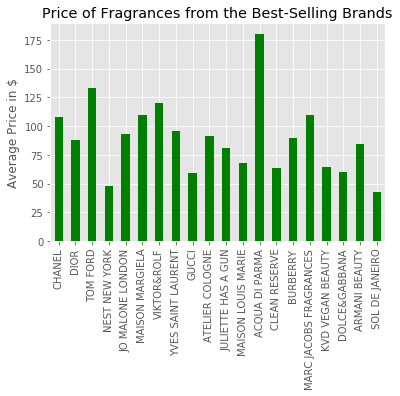

In [561]:
from pandas.api.types import CategoricalDtype
# the prices of perfumes from best-selling brands 
bestbrands = s.brand.tolist()

topbrandprice = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'price']]#.sort_values('price($)', ascending=False)

brand_cat = CategoricalDtype(categories = bestbrands, ordered = True)
topbrandprice['brand'] = topbrandprice['brand'].astype(brand_cat)

topbrandplot = topbrandprice.groupby('brand')['price'].mean()#.sort_values(ascending=False)
topbrandplot.plot.bar(color = 'green')
plt.ylabel('Average Price in $')
plt.xlabel('')
plt.title('Price of Fragrances from the Best-Selling Brands')

Text(0.5, 1.0, 'Ratings of Fragrances from the Best-Selling Brands')

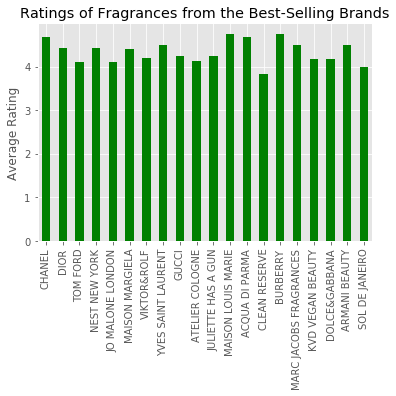

In [674]:
# the prices of perfumes from best-selling brands 
topbrandrating = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'ratings']]#.sort_values('price($)', ascending=False)

brand_cat = CategoricalDtype(categories = bestbrands, ordered = True)
topbrandrating['brand'] = topbrandrating['brand'].astype(brand_cat)

topbrandRat = topbrandrating.groupby('brand')['ratings'].mean()#.sort_values(ascending=False)
topbrandRat.plot.bar(color = 'green')
plt.ylabel('Average Rating')
plt.xlabel('')
plt.title('Ratings of Fragrances from the Best-Selling Brands')

Text(0.5, 1.0, 'Average number of Reviews from the Best-Selling Brands')

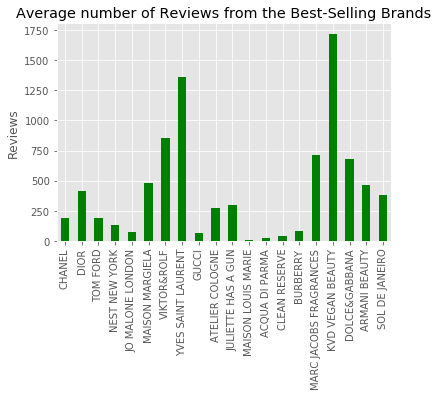

In [675]:
topbrandreviews = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'reviews']]
brand_cat = CategoricalDtype(categories = bestbrands, ordered = True)
topbrandreviews['brand'] = topbrandreviews['brand'].astype(brand_cat)

topbrandreviews = topbrandreviews.groupby('brand')['reviews'].mean()
topbrandreviews.plot.bar(color = 'green')
plt.ylabel('Reviews')
plt.xlabel('')
plt.title('Average number of Reviews from the Best-Selling Brands')

Text(0.5, 1.0, 'Average number of Loves from the Best-Selling Brands')

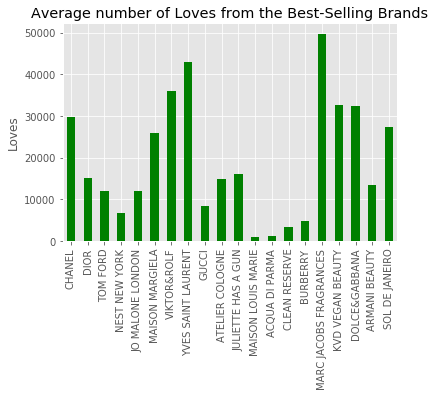

In [676]:
topbrandloves = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'loves']]
#brand_cat = CategoricalDtype(categories = bestbrands, ordered = True)
topbrandloves['brand'] = topbrandloves['brand'].astype(brand_cat)

topbrandloves = topbrandloves.groupby('brand')['loves'].mean()
topbrandloves.plot.bar(color = 'green')
plt.ylabel('Loves')
plt.xlabel('')
plt.title('Average number of Loves from the Best-Selling Brands')

Text(0.5, 1.0, 'Perfume Ratings by Price')

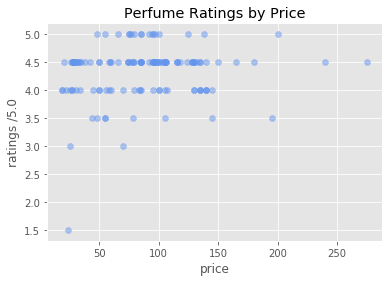

In [677]:
# ratings
# fragrance family
# let's see if ratings follow the trend of best selling perfumes 

plt.scatter(dataset['price'], dataset['ratings'], alpha = 0.5, c = 'cornflowerblue')
plt.xlabel('price')
plt.ylabel('ratings /5.0')
plt.title('Perfume Ratings by Price')

Text(0.5, 1.0, 'Perfume Reviews by Price')

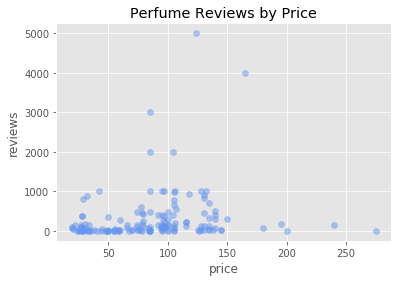

In [568]:
plt.scatter(dataset['price'], dataset['reviews'], alpha = 0.5, c = 'cornflowerblue')
plt.xlabel('price')
plt.ylabel('reviews')
plt.title('Perfume Reviews by Price')

,perf_name,brand,price,reviews,loves,ratings,frag_family,scent_type,key_notes
num,,,,,,,,,
136,Yuzu Eau de Parfum,ACQUA DI PARMA,275.0,6.0,394,4.5,Floral,Warm Florals,"Yuzu, Bergamot, Sandalwood"
110,Tobacco Vanille,TOM FORD,240.0,150.0,20600,4.5,Warm and Spicy,Warm & Sweet Gourmands,"Tobacco Leaf, Ginger, Cocoa"
64,Peonia Nobile Gift Set,ACQUA DI PARMA,200.0,1.0,269,5.0,Floral,Classic Florals,Peony
139,MÉTALLIQUE,TOM FORD,195.0,174.0,3200,3.5,Floral,Powdery Florals,"Pink Peppercorn, Heliotrope, Balsam"
78,Noir Extreme,TOM FORD,180.0,66.0,4200,4.5,Warm and Spicy,Woody Spices,"Cardamom, Orange Flower, Sandalwood"
...,...,...,...,...,...,...,...,...,...
104,Panjore Lychee Home Diffuser,VOLUSPA,24.0,3.0,1200,1.5,NaN,NaN,"Panjore Lychee, Cassis, Juicy Asian Pear"
27,Sinner Eau de Parfum Travel Spray,KVD VEGAN BEAUTY,22.0,155.0,14900,4.0,Earthy and Woody,Warm Woods,"Patchouli, Wood, Cinnamon"
140,Light Blue Mini Duo Set,DOLCE&GABBANA,20.0,37.0,14200,4.5,NaN,NaN,


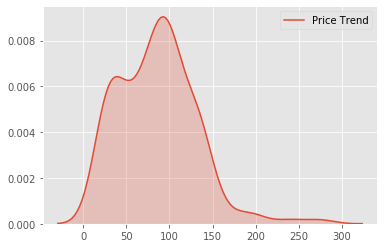

In [671]:
import seaborn as sns
sns.kdeplot(dataset['price'], shade=True, label='Price Trend')
#plt.hist(dataset['price'], bins = 50, facecolor = 'lightblue')
dataset.sort_values('price', ascending =False)

In [ ]:
# pie chart of fragrance family or bar chart
# ingredients wordcloud
# ingredients vs ratings
# fragrance family vs ratings
# price vs ingredients: is there an expensive ingredient?
# which ingredient is the most cost-effective in getting good ratings? 
# ratings/cost averaged for all perfumes containing  each ingredient (or fragrance family)

Floral              44
Fresh               25
Earthy and Woody    19
Warm and Spicy      17
Name: frag_family, dtype: int64

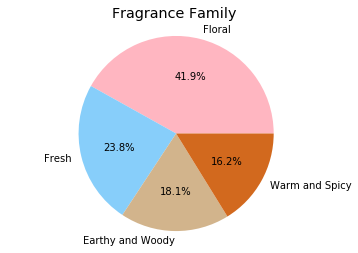

In [650]:
#dataset.groupby('frag_family').value_count()
dataset = dataset.replace('Florals', 'Floral').replace('Warm & Spicy', 'Warm and Spicy').replace(['Earthy & Woody', 'Earth & Woody', 'Woody & Earthy'], 'Earthy and Woody')
colors = ['lightpink', 'lightskyblue', 'tan', 'chocolate']
dataset['frag_family'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Fragrance Family')
plt.ylabel('')
dataset['frag_family'].value_counts()

Text(0.5, 1.0, 'Price of Perfumes by Fragrance Family')

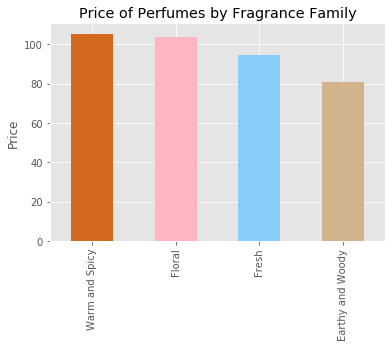

In [651]:
dataset.groupby('frag_family')['price'].mean().sort_values(ascending=False).plot.bar(color = ['chocolate','lightpink', 'lightskyblue', 'tan'])
plt.ylabel('Price')
plt.xlabel('')
plt.title('Price of Perfumes by Fragrance Family')

Text(0.5, 1.0, 'Perfumes of Floral Scent Type')

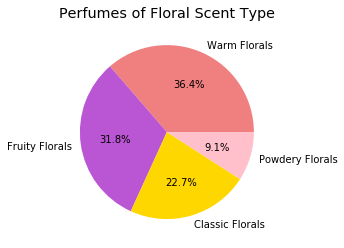

In [652]:
dataset.loc[dataset['frag_family'] == 'Floral']['scent_type'].value_counts()
dataset['scent_type'] = dataset['scent_type'].replace('Warm Floral', 'Warm Florals').replace('Fruity Floral', 'Fruity Florals').replace('Powdery Floral', 'Powdery Florals').replace('Fresh Citrus & Fruits', 'Fruity Florals')
floralColors = ['lightcoral', 'mediumorchid','gold', 'pink', 'paleturquoise']
dataset.loc[dataset['frag_family'] == 'Floral']['scent_type'].value_counts().plot.pie(colors = floralColors, autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Perfumes of Floral Scent Type')


,average reviews
scent_type,
Classic Florals,238.7
Fruity Florals,400.9
Powdery Florals,296.2
Warm Florals,473.0


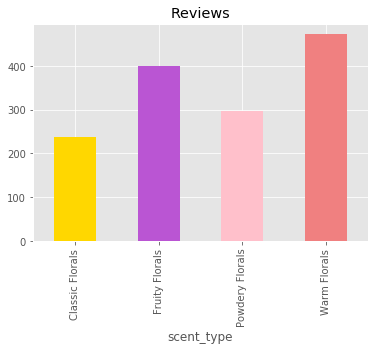

In [658]:
# perfumes with the warm florals scent type, their reviews?
dataset.loc[dataset['scent_type']=='Warm Florals']['reviews']
FloralReviews = dataset.loc[dataset['frag_family']=='Floral'].groupby('scent_type')['reviews'].mean()#.sort_values(ascending=False)#.plot.pie(colors = floralColors, autopct = '%1.1f%%')
#dataset.loc[dataset['frag_family']=='Floral'].groupby('scent_type')['loves'].mean().sort_values(ascending=False).plot.pie(autopct = '%1.1f%%')
# plt.ylabel('')
# plt.title('Reviews of Floral Scent Type')
FloralReviews = pd.DataFrame(round(FloralReviews,1))
FloralReviews.columns = ['average reviews']
FloralReviews.plot.bar(y='average reviews', color = ['gold', 'mediumorchid','pink', 'lightcoral'], legend =None)
plt.ylabel('')
plt.title('Reviews')
FloralReviews

,average loves
scent_type,
Classic Florals,18386.9
Fruity Florals,22997.4
Powdery Florals,25125.0
Warm Florals,20973.6


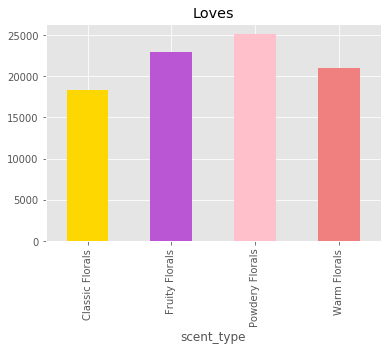

In [659]:
# perfumes with the warm florals scent type, their loves?
FloralLoves = dataset.loc[dataset['frag_family']=='Floral'].groupby('scent_type')['loves'].mean()#.sort_values(ascending=False)#.plot.pie(colors = floralColors, autopct = '%1.1f%%')
FloralLoves = pd.DataFrame(round(FloralLoves,1))
FloralLoves.columns=['average loves']
FloralLoves.plot.bar(y = 'average loves', legend=None, color = ['gold', 'mediumorchid','pink', 'lightcoral'])
plt.ylabel('')
plt.title('Loves')
FloralLoves

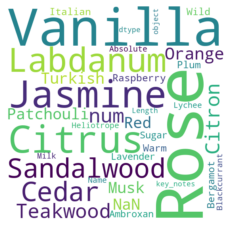

In [587]:
from wordcloud import WordCloud

text = str(dataset['key_notes'])
# Create the wordcloud object
wordcloud = WordCloud(width=550, height=550, margin=0, background_color='white',
                     stopwords=["Accord", "Leaves","Oil"], collocations=False).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


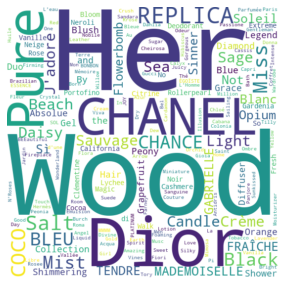

In [666]:
# analyze the name of the perfume
nametext = str(dataset['perf_name'])
name_str = ','.join(str(v) for v in dataset["perf_name"])

# Create the wordcloud object
stop_words2 = ["Eau", "Parfum","Toilette", "de", "set", "Travel", "Mini", "Perfume", 
               "Spray", "Cologne", "For", "Rollerball", "Oil", "Gift", "Fragrance", "Body"]
wordcloud = WordCloud(width=550, height=550, margin=0, background_color='white',
                     stopwords=stop_words2, collocations=False).generate(name_str)
 
# Display the generated image:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [622]:
#dataset['scent_type'].value_counts() #looking at scent type

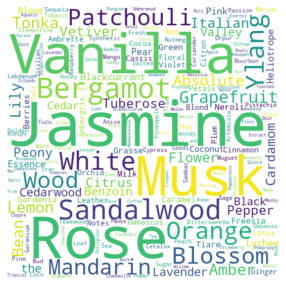

In [664]:
note_str = ','.join(str(v) for v in dataset["key_notes"])

notesWordcloud = WordCloud(width=550, height=550, margin=0, background_color='white',
                     stopwords=["Accord", "Leaves","Oil", "of", "nan"], collocations=False).generate(note_str)

plt.figure(figsize=(5,5))
plt.imshow(notesWordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

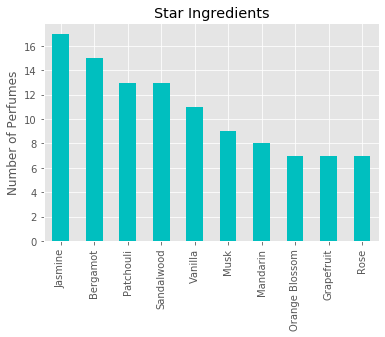

In [630]:
#pd.DataFrame(test).nunique()#.value_counts()
lists = [notes.split(', ') for notes in dataset['key_notes'] if type(notes) != float]
notes_list = [item for sublist in lists for item in sublist]
notes_list = [string.strip() for string in notes_list]
notes_list = [x for x in test if x != '']

pd.Series(notes_list).value_counts().nlargest(10).plot.bar(color = 'c')
plt.title("Star Ingredients")
plt.ylabel("Number of Perfumes")
staring = pd.Series(notes_list).value_counts().nlargest(10)

In [634]:
# What are the perfumes that have this ingredient? 

# dataset['key_notes'] = dataset['key_notes'].fillna('')
# brandswJas = dataset[dataset['key_notes'].str.contains('.*Jasmine', regex=True) & (dataset['brand'].isin(bestbrands))]
# brandswJas['brand'].value_counts()

In [ ]:
# ingredients vs ratings
# fragrance family vs ratings
# which ingredient is the most cost-effective in getting good ratings? 
# ratings/cost averaged for all perfumes containing  each ingredient (or fragrance family)

,ingredient,price
0,Jasmine,88.480769
1,Bergamot,96.250000
2,Patchouli,90.923077
3,Sandalwood,92.605263
4,Vanilla,82.842105
5,Musk,87.571429
6,Mandarin,78.346154
7,Orange Blossom,112.571429
8,Grapefruit,61.950000
9,Rose,96.958333


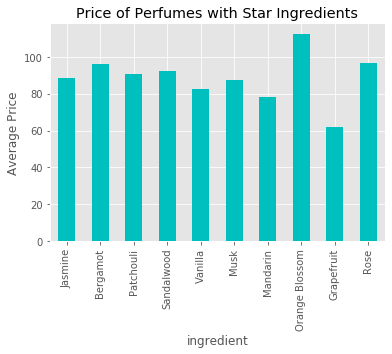

In [635]:
#brandswJas['price'].mean()
dataset['key_notes'] = dataset['key_notes'].fillna('')
avgPrice = [dataset[dataset['key_notes'].str.contains('.*'+ing+'.*', regex=True)]['price'].mean() for ing in staring.keys()]
ingPrice = pd.DataFrame(zip(staring.keys(), avgPrice))
ingPrice.columns = ['ingredient', 'price']
ingPrice.plot.bar(x = 'ingredient', color = 'c', legend= None)
plt.title('Price of Perfumes with Star Ingredients')
plt.ylabel('Average Price')
ingPrice

In [ ]:
#average number of likes/reviews featuring star ingredient
#likes/reviews divided by average price per each star ingredient

,ingredient,reviews
0,Jasmine,447.884615
1,Bergamot,240.150000
2,Patchouli,659.692308
3,Sandalwood,153.684211
4,Vanilla,662.368421
5,Musk,390.523810
6,Mandarin,166.076923
7,Orange Blossom,765.142857
8,Grapefruit,104.600000
9,Rose,357.750000


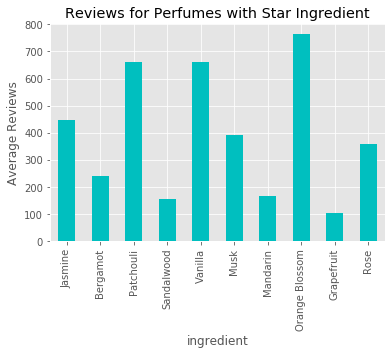

In [636]:
avgReviews = [dataset[dataset['key_notes'].str.contains('.*'+ing+'.*', regex=True)]['reviews'].mean() for ing in staring.keys()]
ingReviews = pd.DataFrame(zip(staring.keys(), avgReviews))
ingReviews.columns = ['ingredient', 'reviews']
ingReviews.plot.bar(x = 'ingredient', color = 'c', legend= None)
plt.title('Reviews for Perfumes with Star Ingredient')
plt.ylabel('Average Reviews')
ingReviews

Text(0, 0.5, 'Average Loves')

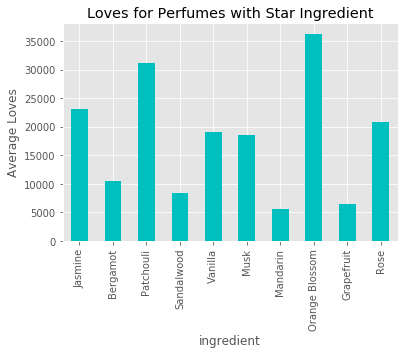

In [637]:
avgLoves = [dataset[dataset['key_notes'].str.contains('.*'+ing+'.*', regex=True)]['loves'].mean() for ing in staring.keys()]
ingLoves = pd.DataFrame(zip(staring.keys(), avgLoves))
ingLoves.columns = ['ingredient', 'loves']
ingLoves.plot.bar(x = 'ingredient', color = 'c', legend= None)
plt.title('Loves for Perfumes with Star Ingredient')
plt.ylabel('Average Loves')

In [551]:
ingPriceRev = pd.merge(ingReviews, ingPrice, how='outer')
ingPriceRev = pd.merge(ingPriceRev, ingLoves, how = 'outer')
ingPriceRev['costEffective'] = ingPriceRev['reviews']/ingPriceRev['price']
ingPriceRev['loves/price'] = ingPriceRev['loves']/ingPriceRev['price']
ingPriceRev

,ingredient,reviews,price,loves,costEffective,loves/price
0,Jasmine,447.846154,88.480769,23084.730769,5.061508,260.901108
1,Bergamot,246.105263,96.842105,10565.526316,2.541304,109.100543
2,Patchouli,672.785714,90.142857,31697.000000,7.463550,351.630745
3,Sandalwood,156.666667,93.027778,8278.444444,1.684085,88.988952
4,Vanilla,661.947368,82.842105,19083.105263,7.990470,230.355146
5,Musk,385.666667,87.666667,18156.761905,4.399240,207.111353
6,Mandarin,165.230769,78.346154,5618.384615,2.108984,71.712322
7,Orange Blossom,764.714286,112.571429,36285.714286,6.793147,322.335025
8,Grapefruit,105.555556,59.388889,6116.000000,1.777362,102.982226
9,Rose,356.833333,96.958333,20780.666667,3.680275,214.325741


,ingredient,costEffective
4,Vanilla,7.990470
2,Patchouli,7.463550
7,Orange Blossom,6.793147
0,Jasmine,5.061508
5,Musk,4.399240
9,Rose,3.680275
1,Bergamot,2.541304
6,Mandarin,2.108984
8,Grapefruit,1.777362
3,Sandalwood,1.684085


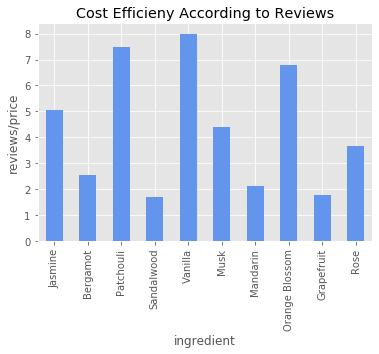

In [667]:
ingPriceRev.plot.bar(x ='ingredient',y = 'costEffective', color = 'cornflowerblue',legend= None)
plt.title('Cost Efficieny According to Reviews')
plt.ylabel('reviews/price')
ingPriceRev.sort_values('costEffective', ascending= False)[['ingredient', 'costEffective']]

,ingredient,loves/price
4,Vanilla,230.355146
2,Patchouli,351.630745
7,Orange Blossom,322.335025
0,Jasmine,260.901108
5,Musk,207.111353
9,Rose,214.325741
1,Bergamot,109.100543
6,Mandarin,71.712322
8,Grapefruit,102.982226
3,Sandalwood,88.988952


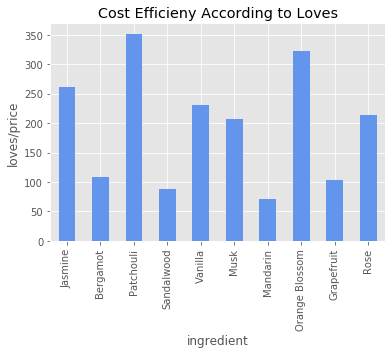

In [668]:
ingPriceRev.plot.bar(x ='ingredient',y = 'loves/price', color = 'cornflowerblue', legend= None)
plt.title('Cost Efficieny According to Loves')
plt.ylabel('loves/price')
ingPriceRev.sort_values('costEffective', ascending= False)[['ingredient', 'loves/price']]